# Next Paper 

In [1]:
from alarms import *
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

# Section 0: Setting Default Variables & Loading Alarm and Operator Data

In [19]:
filter_short_alarms = [20, 120]  #seconds
path = "./data/new/"

In [3]:
alarms_fname = "formatted-all-month-alarms.csv" 
operator_fname = "operator-all-month-actions.csv"

df_main_alarms = pd.read_csv(path + alarms_fname, low_memory=False ,parse_dates=["StartTime", "EndTime"])
df_main_alarms["TimeDelta"] = df_main_alarms["EndTime"] - df_main_alarms["StartTime"]
df_main_alarms["TimeDelta"] = df_main_alarms["TimeDelta"].apply(lambda arg: timedelta.total_seconds(arg)) 
df_main_alarms["Month"] = df_main_alarms["StartTime"].apply(lambda arg: arg.month)

df_main_actions = pd.read_csv(path + operator_fname, low_memory=False ,parse_dates=["EventTime"])
df_main_actions["Month"] = df_main_actions["EventTime"].apply(lambda arg: arg.month)

In [4]:
df_main_actions.info(), df_main_alarms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56656 entries, 0 to 56655
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MachineName    56656 non-null  object        
 1   SourceName     56656 non-null  object        
 2   EventTime      56656 non-null  datetime64[ns]
 3   Severity       56656 non-null  int64         
 4   Message        56656 non-null  object        
 5   Mask           56656 non-null  int64         
 6   NewState       56656 non-null  int64         
 7   EventType      56656 non-null  object        
 8   EventCategory  56656 non-null  object        
 9   AckReq         56656 non-null  bool          
 10  ActorID        56656 non-null  object        
 11  Attributes     56656 non-null  object        
 12  Area           56656 non-null  object        
 13  Month          56656 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(8)
memory usage: 5.7+ 

(None, None)

# Section 1: Removing Chattering from Alarms Data

### use case=> Bandwidht and Storage Reduction

Retention period.

Suppose that on average each alarm takes roughly 1KB of sotorage space. 



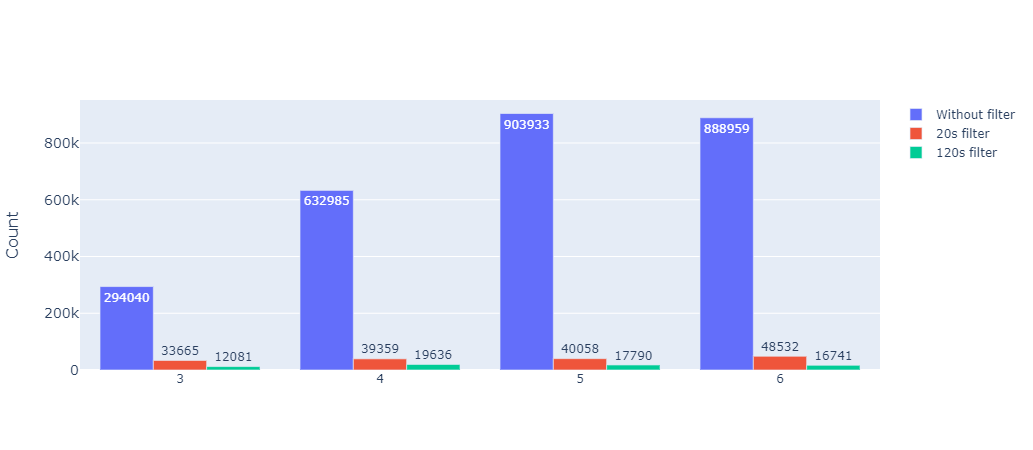

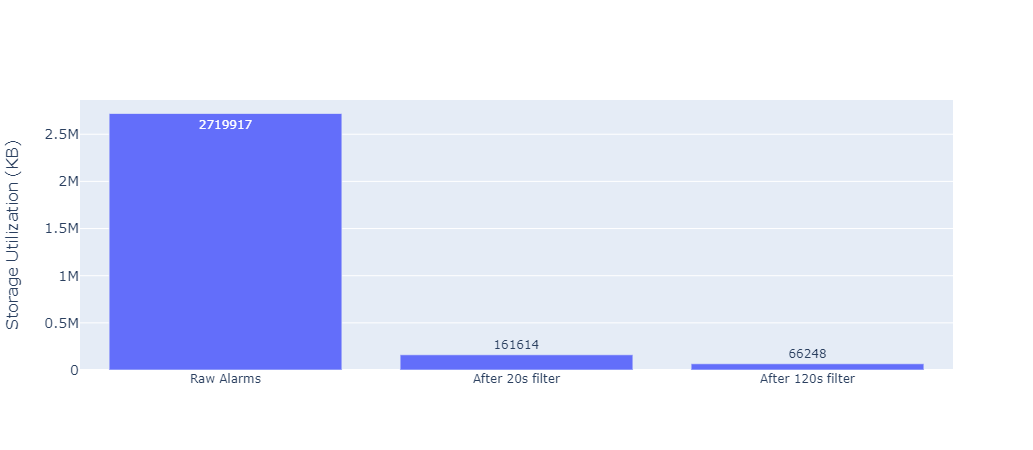

In [30]:
def removeShortDurationAlarms(df, duration_filters=[20,120]):
    df_f1 = df[df["TimeDelta"]>duration_filters[0]] # keep the alarms whose duration is larger than the filter
    df_f2 = df[df["TimeDelta"]>duration_filters[1]]
    
    
    d = df["Month"].value_counts()
    mcounts = [t for t in sorted(d.items(), key= lambda arg: arg[0])]
    trace1 = go.Bar(name='Without filter',x=[t[0] for t in mcounts], y= [t[1] for t in mcounts ],  text=[t[1] for t in mcounts],  textposition='auto')

    
    d = df_f1["Month"].value_counts()
    mcounts = [t for t in sorted(d.items(), key= lambda arg: arg[0])]
    trace2 = go.Bar(name='{}s filter'.format(duration_filters[0]),x=[t[0] for t in mcounts], y= [t[1] for t in mcounts ],  text=[t[1] for t in mcounts],  textposition='auto')
    
    d = df_f2["Month"].value_counts()
    mcounts = [t for t in sorted(d.items(), key= lambda arg: arg[0])]
    trace3 = go.Bar(name="{}s filter".format(duration_filters[1]),x=[t[0] for t in mcounts], y= [t[1] for t in mcounts ],  text=[t[1] for t in mcounts],  textposition='auto')
        
    
    fig = go.Figure()
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3)
    fig.update_layout(barmode='group', yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ))
    fig.show()
    

def storageAnalysis(df,duration_filters=[20,120]):
    df_f1 = df[df["TimeDelta"]>duration_filters[0]] # keep the alarms whose duration is larger than the filter
    df_f2 = df[df["TimeDelta"]>duration_filters[1]]
    
    x_axis = ["Raw Alarms", "After {}s filter".format(duration_filters[0]),"After {}s filter".format(duration_filters[1])]
    y_axis = [df.shape[0], df_f1.shape[0],df_f2.shape[0]]
    
    trace = go.Bar(x=x_axis, y=y_axis, text=y_axis,  textposition='auto')
        
    
    fig = go.Figure()
    fig.add_trace(trace)
    fig.update_layout(yaxis=dict(
        title='Storage Utilization (KB)',
        titlefont_size=16,
        tickfont_size=14,
    ))
    fig.show()
               
               
#     print(">>Total # of alarms after applying {}s filter  {}".format(duration_filters[0],df1.shape[0]))
#     print(">>Total # of alarms after applying {}s filter  {}".format(duration_filters[1],df1.shape[0]))
    

removeShortDurationAlarms(df_main_alarms)
storageAnalysis(df_main_alarms)

# Section 2: Relating Operator Action with Alarm Data

# Section 3: Finding the most important alarms in the data. 

# Extras


### Per Sensor Based Analysis